In [5]:
# Group 9- EMPLOYEE ATTRITION: FINAL CODE

# Saumya Goyal
# Yajash Pandey
# Shimeng Cao
# Jeffrey Younghoon Kim

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


%matplotlib inline
sns.set(style='ticks', palette='Set2')

import sys
sys.path.append("..")
!sudo pip install html2text 
from ds_utils.features_pipeline_3 import pipeline_from_config

# URL
url = "https://raw.githubusercontent.com/ShimengC/test1/master/WA_Fn-UseC_-HR-Employee-Attrition.csv"
hr_df = pd.read_csv(url).dropna()
# list(hr_df)

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [7]:
hr_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b8bbac8>,
      dtype=object)

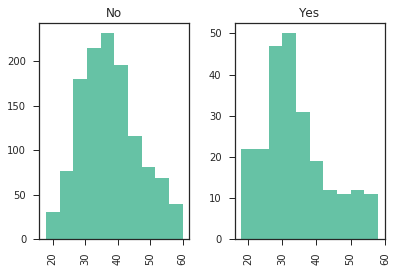

In [8]:
hr_df.Age.hist(by=hr_df["Attrition"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b7f6c50>,
      dtype=object)

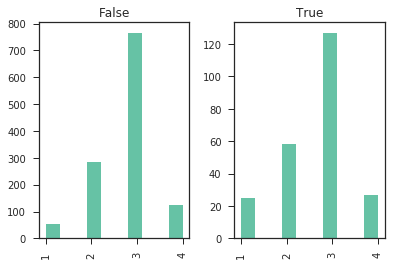

In [9]:
hr_df.WorkLifeBalance.hist(by=(hr_df["Attrition"]=="Yes"))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa297b2208>,
      dtype=object)

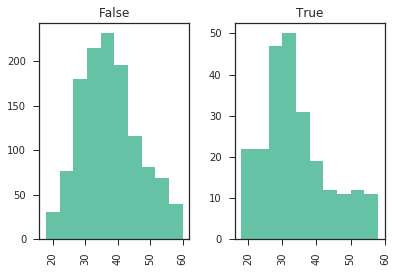

In [10]:
hr_df.Age.hist(by=hr_df["Attrition"]=='Yes')

In [11]:
config = [
    {
        "field": "Attrition",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "Age",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "BusinessTravel",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "DailyRate",
        "transformers": [
            {"name": "standard_numeric"}
#             {
#                 "name": "quantile_numeric",
#                 "config": {"n_quantiles": 10}
#             }
        ]
    } ,
    {
        "field": "Department",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "DistanceFromHome",
        "transformers": [
            {"name": "range_numeric"}
        ]
    } ,
    {
        "field": "Education",
        "transformers": [
            {"name": "dummyizer"}
        ]
    } ,
    {
        "field": "EducationField",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "EmployeeCount",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "EmployeeNumber",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "EnvironmentSatisfaction",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "Gender",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "HourlyRate",
        "transformers": [
            {"name": "standard_numeric"}
#             {
#                 "name": "quantile_numeric",
#                 "config": {"n_quantiles": 10}
#             }
        ]
    },
    {
        "field": "JobInvolvement",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "JobLevel",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "JobRole",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "JobSatisfaction",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "MaritalStatus",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "MonthlyIncome",
        "transformers": [
            {"name": "standard_numeric"}
#             {
#                 "name": "quantile_numeric",
#                 "config": {"n_quantiles": 10}
#             }
        ]
    },
    {
        "field": "MonthlyRate",
        "transformers": [
            {"name": "standard_numeric"}
#             {
#                 "name": "quantile_numeric",
#                 "config": {"n_quantiles": 10}
#             }
        ]
    },
    {
        "field": "NumCompaniesWorked",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "Over18",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "OverTime",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "PercentSalaryHike",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "PerformanceRating",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "RelationshipSatisfaction",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "StandardHours",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "StockOptionLevel",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "TotalWorkingYears",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "TrainingTimesLastYear",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "WorkLifeBalance",
        "transformers": [
            {"name": "dummyizer"}
        ]
    },
    {
        "field": "YearsAtCompany",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "YearsInCurrentRole",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "YearsSinceLastPromotion",
        "transformers": [
            {"name": "range_numeric"}
        ]
    },
    {
        "field": "YearsWithCurrManager",
        "transformers": [
            {"name": "range_numeric"}
        ]
    }
]

from sklearn.model_selection import train_test_split

# train_df, test_df, y_train, y_test = train_test_split(hr_df, hr_df["Attrition"], train_size=0.75, test_size=0.25)

pipeline = pipeline_from_config(config)
# X_train = pipeline.fit_transform(train_df)
# X_test = pipeline.transform(test_df)

# model = LogisticRegression()
# model.fit(X_train, y_train)

transformed = pipeline.fit_transform(hr_df)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

In [12]:
np.size(transformed,1)
np.size(transformed,0)
transformed_df=pd.DataFrame(transformed)
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.0,0.547619,0.0,0.0,1.0,0.742527,0.0,0.0,1.0,0.000000,...,0.200,0.0,1.0,0.0,0.0,0.0,0.15,0.222222,0.000000,0.294118
1,0.0,0.738095,0.0,1.0,0.0,-1.297775,0.0,1.0,0.0,0.250000,...,0.250,0.5,0.0,0.0,1.0,0.0,0.25,0.388889,0.066667,0.411765
2,1.0,0.452381,0.0,0.0,1.0,1.414363,0.0,1.0,0.0,0.035714,...,0.175,0.5,0.0,0.0,1.0,0.0,0.00,0.000000,0.000000,0.000000
3,0.0,0.357143,0.0,1.0,0.0,1.461466,0.0,1.0,0.0,0.071429,...,0.200,0.5,0.0,0.0,1.0,0.0,0.20,0.388889,0.200000,0.000000
4,0.0,0.214286,0.0,0.0,1.0,-0.524295,0.0,1.0,0.0,0.035714,...,0.150,0.5,0.0,0.0,1.0,0.0,0.05,0.111111,0.133333,0.117647


In [13]:
transformed_df.columns = [
 'Attrition',
 'Age',
 'BusinessTravel_None','BusinessTravel_Frequently', 'BusinessTravel_Rarely',
 'DailyRate',
 'Department_HR','Department_RnD','Department_Sales',
 'DistanceFromHome',
 'Education_BelowCollege','Education_College','Education_Bachelor','Education_Master','Education_Doc',
 'EducationField_HR','EducationField_LS','EducationField_MKT','EducationField_Med','EducationField_Other','EducationField_Tech',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction_L','EnvironmentSatisfaction_M','EnvironmentSatisfaction_H','EnvironmentSatisfaction_VH',
 'Gender',
 'HourlyRate',
 'JobInvolvement_L','JobInvolvement_M','JobInvolvement_H','JobInvolvement_VH',
 'JobLevel_1','JobLevel_2','JobLevel_3','JobLevel_4','JobLevel_5',
 'JobRole_HCR','JobRole_HR','JobRole_LT','JobRole_M','JobRole_MD','JobRole_RD','JobRole_RS','JobRole_SE','JobRole_SR',
 'JobSatisfaction_L','JobSatisfaction_M','JobSatisfaction_H','JobSatisfaction_VH',
 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction_L','RelationshipSatisfaction_M','RelationshipSatisfaction_H','RelationshipSatisfaction_VH',
 'StandardHours',
 'StockOptionLevel_0','StockOptionLevel_1','StockOptionLevel_2','StockOptionLevel_3',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance_Bad','WorkLifeBalance_Good','WorkLifeBalance_Better','WorkLifeBalance_Best',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [14]:
transformed_df.head()

,Attrition,Age,BusinessTravel_None,BusinessTravel_Frequently,BusinessTravel_Rarely,DailyRate,Department_HR,Department_RnD,Department_Sales,DistanceFromHome,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance_Bad,WorkLifeBalance_Good,WorkLifeBalance_Better,WorkLifeBalance_Best,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,0.547619,0.0,0.0,1.0,0.742527,0.0,0.0,1.0,0.000000,...,0.200,0.0,1.0,0.0,0.0,0.0,0.15,0.222222,0.000000,0.294118
1,0.0,0.738095,0.0,1.0,0.0,-1.297775,0.0,1.0,0.0,0.250000,...,0.250,0.5,0.0,0.0,1.0,0.0,0.25,0.388889,0.066667,0.411765
2,1.0,0.452381,0.0,0.0,1.0,1.414363,0.0,1.0,0.0,0.035714,...,0.175,0.5,0.0,0.0,1.0,0.0,0.00,0.000000,0.000000,0.000000
3,0.0,0.357143,0.0,1.0,0.0,1.461466,0.0,1.0,0.0,0.071429,...,0.200,0.5,0.0,0.0,1.0,0.0,0.20,0.388889,0.200000,0.000000
4,0.0,0.214286,0.0,0.0,1.0,-0.524295,0.0,1.0,0.0,0.035714,...,0.150,0.5,0.0,0.0,1.0,0.0,0.05,0.111111,0.133333,0.117647


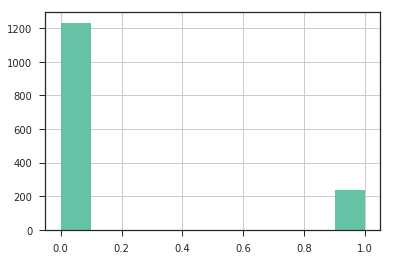

In [15]:
transformed_df.Attrition.hist()

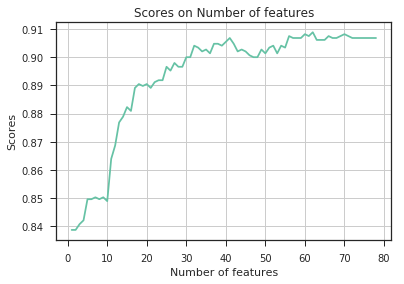

Features sorted by their rank:
62
0.9040816326530612
[(1, 'Age'), (1, 'BusinessTravel_Frequently'), (1, 'BusinessTravel_None'), (1, 'Department_HR'), (1, 'Department_RnD'), (1, 'DistanceFromHome'), (1, 'EducationField_LS'), (1, 'EducationField_Med'), (1, 'EducationField_Other'), (1, 'EnvironmentSatisfaction_L'), (1, 'JobInvolvement_L'), (1, 'JobInvolvement_VH'), (1, 'JobLevel_2'), (1, 'JobLevel_5'), (1, 'JobRole_RD'), (1, 'JobRole_RS'), (1, 'JobSatisfaction_L'), (1, 'JobSatisfaction_VH'), (1, 'MonthlyIncome'), (1, 'NumCompaniesWorked'), (1, 'OverTime'), (1, 'RelationshipSatisfaction_L'), (1, 'StockOptionLevel_0'), (1, 'StockOptionLevel_1'), (1, 'StockOptionLevel_2'), (1, 'TotalWorkingYears'), (1, 'TrainingTimesLastYear'), (1, 'WorkLifeBalance_Bad'), (1, 'YearsAtCompany'), (1, 'YearsInCurrentRole'), (1, 'YearsSinceLastPromotion'), (1, 'YearsWithCurrManager'), (2, 'WorkLifeBalance_Better'), (3, 'JobLevel_4'), (4, 'JobRole_HCR'), (5, 'EducationField_Tech'), (6, 'JobInvolvement_H'), (7, 'R

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# dataframe = read_csv(url)
array = transformed_df.values
array.view()
np.size(array,0)
X = array[:,1:80]
a = array[:,0:1]
Y = a.ravel()
np.size(Y)

model = LogisticRegression()

scores = []
num_features = []
score_max=0
num_features_max=0
for i in range (1,79):
    rfe = RFE(model, i)
    fit = rfe.fit(X, Y)
    s=fit.score(X, Y)
#     print ("%d %0.3f" %(i, s))
    scores.append(s)
    num_features.append(i)
    if(s>score_max):
        score_max=s
        num_features_max=i
    
plt.plot(num_features,scores)
plt.title("Scores on Number of features")
plt.xlabel("Number of features")
plt.ylabel("Scores")
plt.grid()
plt.show()

rfe = RFE(model, 32)
fit = rfe.fit(X, Y)
final_score=fit.score(X, Y)

# fit.support_
# fit.ranking_
names = list(transformed_df)[1:]
 
print ("Features sorted by their rank:")
print (num_features_max)
print (final_score)
print (sorted(zip(map(lambda x: round(x, 4), fit.ranking_), names)))


In [17]:
predicted_array = sorted(zip(map(lambda x: round(x, 4), fit.ranking_), names))

predictors=[]
for r in range (0,32):
    predictors.append(predicted_array[[r][0]][1])

# len(predictors)
predictors

['Age',
 'BusinessTravel_Frequently',
 'BusinessTravel_None',
 'Department_HR',
 'Department_RnD',
 'DistanceFromHome',
 'EducationField_LS',
 'EducationField_Med',
 'EducationField_Other',
 'EnvironmentSatisfaction_L',
 'JobInvolvement_L',
 'JobInvolvement_VH',
 'JobLevel_2',
 'JobLevel_5',
 'JobRole_RD',
 'JobRole_RS',
 'JobSatisfaction_L',
 'JobSatisfaction_VH',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'RelationshipSatisfaction_L',
 'StockOptionLevel_0',
 'StockOptionLevel_1',
 'StockOptionLevel_2',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance_Bad',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

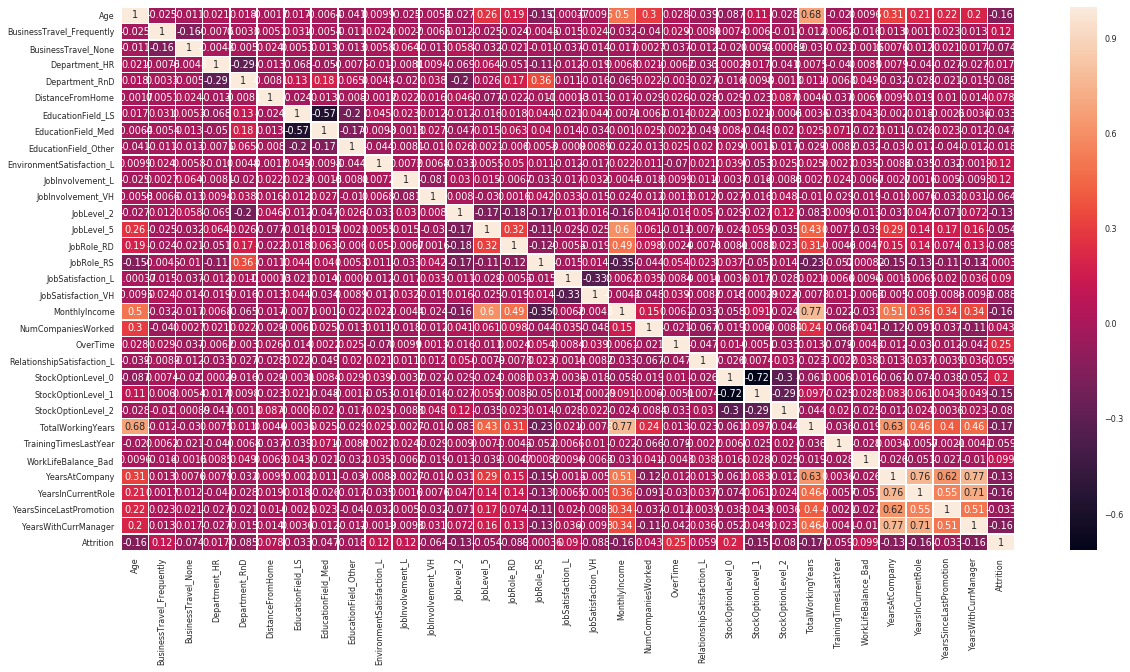

In [18]:
new_list = []
new_list = predictors.copy()
new_list.append("Attrition")

pred_target_df=transformed_df[new_list]

sns.set(font_scale=.8)
plt.figure(figsize=(20,10))
sns.heatmap(pred_target_df.corr(),annot=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

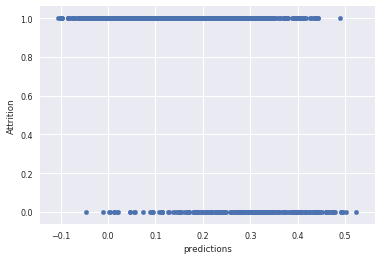

In [19]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

cleaned_df = transformed_df
target = "Attrition"

linear = linear_model.Lasso(alpha=0.01)
linear.fit(cleaned_df[predictors], cleaned_df[target])

pd.DataFrame([dict(zip(predictors, linear.coef_))])

X_train, X_test, y_train, y_test = train_test_split(cleaned_df[predictors],
                                                    cleaned_df[target],
                                                    test_size=0.25,
                                                    random_state=42)
linear.fit(X_train, y_train)
preds = linear.predict(cleaned_df[predictors])
predictions_df = cleaned_df.assign(predictions=preds)

pd.to_numeric(predictions_df['Attrition']).astype(float)
predictions_df['Attrition'] = predictions_df['Attrition'].factorize()[0]
predictions_df.plot(kind="scatter", x="predictions", y="Attrition")

# predictions_df
# cleaned_df[target]
# predictors

Best ROC for logistic regression: 0.865, using 
{'penalty': 'l2', 'C': 5.0}
0.8648788601600299


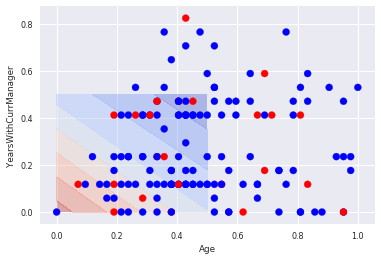

In [20]:
from ds_utils.decision_surface import *
#Grid search using C for logistic regression .C is the inverse of parameter regularization for Logistic regression
grid = {
    'penalty':['l1','l2'],
    'C':[0.001, 0.01, 0.1, 1.0, 5.0, 7.5,10.0,15.0, 20.0, 40.0, 100.0]
}

tuned_lr_model = GridSearchCV(LogisticRegression(), grid, scoring="roc_auc")
tuned_lr_model.fit(X_train, y_train)

print ("Best ROC for logistic regression: %0.3f, using " % tuned_lr_model.best_score_)
print (tuned_lr_model.best_params_)
print (tuned_lr_model.best_score_)

Decision_Surface(transformed_df[predictors], "Age", "YearsWithCurrManager", transformed_df["Attrition"], tuned_lr_model, True, sample=0.1)


In [21]:
#Grid search for random forest
grid = {
    "n_estimators": list(range(1, 100, 5))
}

rf_tuned_model = GridSearchCV(RandomForestClassifier(), grid, scoring="roc_auc", verbose=1)
rf_tuned_model.fit(X_train, y_train)

print ("Best ROC for random forest: %0.3f, using: " % rf_tuned_model.best_score_)
print (rf_tuned_model.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best ROC for random forest: 0.813, using: 
{'n_estimators': 66}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.3s finished


In [22]:
#Grid search for decision tree
grid = {
    "min_samples_leaf": list(range(5, 100, 5))
}

#tuned model for decision tree
tuned_model = GridSearchCV(DecisionTreeClassifier(), grid, scoring="roc_auc")
tuned_model.fit(X_train, y_train)

print ("Best ROC for decision tree classifier: %0.3f, using: " % tuned_model.best_score_)
print (tuned_model.best_params_)

Best ROC for decision tree classifier: 0.753, using: 
{'min_samples_leaf': 20}


In [23]:
import sklearn.model_selection as cv
from sklearn.metrics import accuracy_score

def evaluate_model_on_sample(df, model, predictor_cols, class_col, pct, scoring=roc_auc_score):
    kf = cv.StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    scores = []

    X = df[predictor_cols]
    y = df[class_col]
    
    for train_index, test_index in kf.split(X, y):  
        
        sampled_indices = np.random.permutation(range(len(train_index)))[:int(pct*len(train_index))].tolist()
        np_train = np.array(train_index)
        to_get = np_train[sampled_indices]

        model.fit(X.loc[to_get], y[to_get])
        scores.append(scoring(y[test_index], model.predict(X.loc[test_index])))
        
    return np.mean(scores), np.std(scores)



In [24]:

pcts = np.linspace(0.01,1,100).tolist()
dt_scores = [evaluate_model_on_sample(transformed_df,
                                     DecisionTreeClassifier(),
                                     predictors,
                                     "Attrition",
                                     pct)
             for pct in pcts]


lr_scores = [evaluate_model_on_sample(transformed_df,
                                      LogisticRegression(),
                                      predictors,
                                      "Attrition",
                                      pct)
             for pct in pcts]

rf_scores = [evaluate_model_on_sample(transformed_df,
                                      RandomForestClassifier(),
                                      predictors,
                                      "Attrition",
                                      pct)
             for pct in pcts]


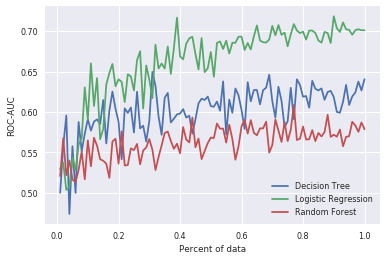

In [60]:
raw_dt_score = np.array([s[0] for s in dt_scores])
std_dt_score = np.array([s[1] for s in dt_scores])

raw_lr_score = np.array([s[0] for s in lr_scores])
std_lr_score = np.array([s[1] for s in lr_scores])

raw_rf_score = np.array([s[0] for s in rf_scores])
std_rf_score = np.array([s[1] for s in rf_scores])


plt.plot(pcts, raw_dt_score, label="Decision Tree")
plt.plot(pcts, raw_lr_score, label="Logistic Regression")
plt.plot(pcts, raw_rf_score, label="Random Forest")

plt.xlabel("Percent of data")
plt.ylabel("ROC-AUC")
plt.legend()
plt.show()

In [26]:
# Cross Validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.856


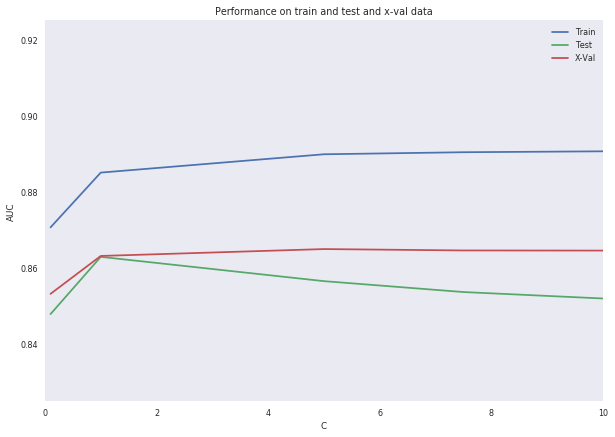

In [61]:
#Fitting Curve

aucs_train = []
aucs_test = []
aucs_xval = []
# maxdepth = 30
C_val = [0.1, 1.0, 5.0, 7.5,10.0,15.0, 20.0, 25.0]

plt.figure(figsize=[10,7])

for c in C_val:
    model = LogisticRegression(C=c, penalty='l2')
    model.fit(X_train, y_train)
    
    aucs_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    aucs_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
    scores = cross_val_score(model, X_train, y_train, scoring="roc_auc")
    aucs_xval.append(scores.mean())

plt.plot( C_val,aucs_train,label="Train")
plt.plot( C_val,aucs_test,label="Test")
plt.plot( C_val,aucs_xval,label="X-Val")
plt.title("Performance on train and test and x-val data")
plt.grid()
plt.xlabel("C")
plt.ylabel("AUC")
plt.ylim([0.825, 0.925])
plt.xlim([0,10])
plt.legend()
plt.show()

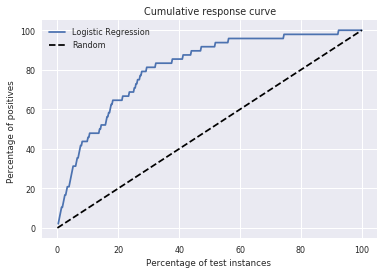

In [62]:
# Cumalative response curve

model = LogisticRegression(C=5.0,penalty='l2')
model.fit(X_train, y_train)


Y_test_predicted = model.predict(X_test)
Y_test_probability = model.predict_proba(X_test)[:, 1]


order = np.argsort(Y_test_probability)[::-1]
Y_test_predicted_sorted = Y_test_predicted[order]
Y_test_sorted = np.array(y_test)[order]

total_test_positives = y_test.sum()

y_cumulative = Y_test_sorted.cumsum()*100/float(total_test_positives)
x_cumulative = np.linspace(1, len(y_cumulative), len(y_cumulative))*100/len(y_cumulative)



plt.plot(x_cumulative, y_cumulative, label="Logistic Regression")
plt.plot([0,100], [0,100], 'k--', label="Random")
plt.xlabel("Percentage of test instances ")
plt.ylabel("Percentage of positives ")
plt.title("Cumulative response curve")
plt.legend()
plt.show()

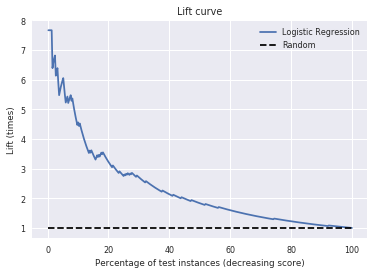

In [63]:
# Lift curve

y_lift = y_cumulative/x_cumulative

plt.plot(x_cumulative, y_lift, label="Logistic Regression")
plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=5.0, penalty='l2')
model.fit(X_train, y_train)
predValues = model.predict(X_test)

# "pretty print" the confusion matrix
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, predValues, labels=[1, 0]).T
confusion_matrix_one = pd.DataFrame(conf_matrix, columns=['p', 'n'], index=['Y', 'N'])

confusion_matrix_one

,p,n
Y,21,11
N,27,309


In [33]:
conf_matrix_probs = conf_matrix/float(conf_matrix.sum())
confusion_matrix_one_probs = pd.DataFrame(conf_matrix_probs, columns=['p', 'n'], index=['Y', 'N'])

confusion_matrix_one_probs

,p,n
Y,0.057065,0.029891
N,0.073370,0.839674


In [35]:
precision = metrics.precision_score(y_test, predValues)
recall = metrics.recall_score(y_test, predValues)

print ("precision: %0.3f, recall: %0.3f" % (precision, recall))

precision: 0.656, recall: 0.438


In [49]:
from sklearn.cluster import KMeans

# non_confounding=pred_target_df[
km = KMeans(n_clusters=2, init='k-means++', n_init=10)

In [50]:
km.fit(pred_target_df)
cluster = km.fit_predict(pred_target_df)
# len(cluster)
# cluster
pred_target_df["Clusters"]=cluster
pred_target_df.head()

# km.fit(transformed_df)
# cluster = km.fit_predict(transformed_df)
# # len(cluster)
# # cluster
# transformed_df["Clusters"]=cluster
# transformed_df.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Age,BusinessTravel_Frequently,BusinessTravel_None,Department_HR,Department_RnD,DistanceFromHome,EducationField_LS,EducationField_Med,EducationField_Other,EnvironmentSatisfaction_L,...,StockOptionLevel_2,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance_Bad,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Clusters
0,0.547619,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.200,0.0,1.0,0.15,0.222222,0.000000,0.294118,1.0,1
1,0.738095,1.0,0.0,0.0,1.0,0.250000,1.0,0.0,0.0,0.0,...,0.0,0.250,0.5,0.0,0.25,0.388889,0.066667,0.411765,0.0,1
2,0.452381,0.0,0.0,0.0,1.0,0.035714,0.0,0.0,1.0,0.0,...,0.0,0.175,0.5,0.0,0.00,0.000000,0.000000,0.000000,1.0,1
3,0.357143,1.0,0.0,0.0,1.0,0.071429,1.0,0.0,0.0,0.0,...,0.0,0.200,0.5,0.0,0.20,0.388889,0.200000,0.000000,0.0,1
4,0.214286,0.0,0.0,0.0,1.0,0.035714,0.0,1.0,0.0,1.0,...,0.0,0.150,0.5,0.0,0.05,0.111111,0.133333,0.117647,0.0,1


In [57]:
Cluster0=pred_target_df[pred_target_df['Clusters'] == 0] 
left_Cluster0=Cluster0[Cluster0['Attrition'] == 1]
stayed_Cluster0=Cluster0[Cluster0['Attrition'] == 0]

Cluster1=pred_target_df[pred_target_df['Clusters'] == 1] 
left_Cluster1=Cluster1[Cluster1['Attrition'] == 1]
stayed_Cluster1=Cluster1[Cluster1['Attrition'] == 0]

# Cluster2=pred_target_df[pred_target_df['Clusters'] == 2] 
# left_Cluster2=Cluster2[Cluster2['Attrition'] == 1]
# stayed_Cluster2=Cluster2[Cluster2['Attrition'] == 0]

# len(Cluster0['Attrition'])
# len(Cluster1)
# len(pred_target_df["Clusters"] == 1)
# left_df=transformed_df[transformed_df['Attrition'] == 1]
# stayed_df=transformed_df[transformed_df['Attrition'] == 0]

# len(left_df)
# len(stayed_df)

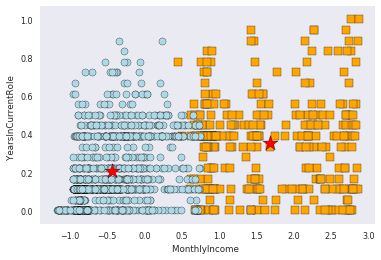

In [58]:
# attrition=pred_target_df['Attrition']

plt.scatter(Cluster0['MonthlyIncome'],
            Cluster0["YearsInCurrentRole"],
             s=50, c='orange',
             marker='s', edgecolor='black',
             label='cluster 1')
plt.scatter(Cluster1['MonthlyIncome'],
             Cluster1["YearsInCurrentRole"],
             s=50, c='lightblue',
             marker='o', edgecolor='black',
             label='cluster 2')
# plt.scatter(pred_target_df[cluster == 2],
#              pred_target_df[cluster == 2],
#              s=50, c='red',
#              marker='o', edgecolor='black',
#              label='cluster 3')
plt.scatter(km.cluster_centers_[:, 18],
             km.cluster_centers_[:, 29],
             s=250, marker='*',
             c='red', edgecolor='black',
             label='centroids')
# plt.legend(scatterpoints=1)
plt.xlabel("MonthlyIncome ")
plt.ylabel("YearsInCurrentRole ")
plt.grid()
plt.show()

# list(Cluster1)
# Cluster1.head()


In [86]:
# %matplotlib inline
# columns=list(Cluster0)
# len(columns)

# rows=len(columns)-3
# cols=len(columns)-4
# ct=0
# # plt.figure(figsize=[15,7*rows])
# for i in range(len(columns) - 3):
#     for j in range(i+1, len(columns)):
#         coli = Cluster0.columns[i]
#         colj = Cluster0.columns[j]
# #         plt.subplot(rows, cols, ct)
#         plt.scatter(Cluster0['MonthlyIncome'],
#                     Cluster0["YearsInCurrentRole"],
#                      s=50, c='orange',
#                      marker='s', edgecolor='black',
#                      label='cluster 1')
#         plt.scatter(Cluster1['MonthlyIncome'],
#                      Cluster1["YearsInCurrentRole"],
#                      s=50, c='lightblue',
#                      marker='o', edgecolor='black',
#                      label='cluster 2')
# # # plt.scatter(pred_target_df[cluster == 2],
# # #              pred_target_df[cluster == 2],
# # #              s=50, c='red',
# # #              marker='o', edgecolor='black',
# # #              label='cluster 3')
#         plt.scatter(km.cluster_centers_[:, 18],
#                      km.cluster_centers_[:, 29],
#                      s=250, marker='*',
#                      c='red', edgecolor='black',
#                      label='centroids')
#         # plt.legend(scatterpoints=1)
#         plt.xlabel(coli)
#         plt.ylabel(colj)
#         plt.grid()
#         plt.show()


In [53]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# final_df=transformed_df[predictors]
cluster0_mean_df=Cluster0.groupby("Attrition").mean()
# .std()

diff_abs=abs(cluster0_mean_df.iloc[0]-cluster0_mean_df.iloc[1])/cluster0_mean_df.iloc[0]

diff=pd.DataFrame(diff_abs)
diff_sort=diff.sort_values(0,ascending=False)
diff_sort
# 2.146464579505202



,0
JobInvolvement_L,3.274691
JobRole_RS,1.000000
EducationField_Other,1.000000
EnvironmentSatisfaction_L,0.832011
OverTime,0.754873
JobRole_RD,0.736942
StockOptionLevel_0,0.619883
Department_HR,0.578348
StockOptionLevel_2,0.533670
JobSatisfaction_L,0.519890


In [83]:
# !sudo pip install causalinference
# list(transformed_df)

In [85]:
from causalinference import CausalModel

causal_model = CausalModel(
    X=transformed_df[['JobInvolvement_L','WorkLifeBalance_Bad',
                        'EnvironmentSatisfaction_L',
                        'BusinessTravel_Frequently',
                        'StockOptionLevel_0',
                        'StockOptionLevel_2',
                        'BusinessTravel_None',
                        'JobSatisfaction_L']].values,
    D=transformed_df.OverTime.values,
    Y=transformed_df.Attrition.values
)
causal_model.est_propensity()
causal_model.trim_s()
causal_model.stratify_s()
causal_model.est_via_ols()
causal_model.est_via_matching(bias_adj=True)
causal_model.est_via_weighting()

print(causal_model.summary_stats)
print(causal_model.estimates)
print(causal_model.propensity)

print(causal_model.strata)

/usr/local/lib/python3.5/dist-packages/causalinference/core/summary.py:110: RuntimeWarning: invalid value encountered in true_divide
  return (mean_t-mean_c) / np.sqrt((sd_c**2+sd_t**2)/2)
/usr/local/lib/python3.5/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]



Summary Statistics

                      Controls (N_c=1054)         Treated (N_t=416)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.104        0.306        0.305        0.461        0.201

                      Controls (N_c=1054)         Treated (N_t=416)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.055        0.228        0.060        0.238        0.022
             X1        0.055        0.228        0.053        0.224       -0.009
             X2        0.211        0.408        0.149        0.357       -0.161
             X3        0.181        0.385        0.207        0.405        0.065
             X4        0.426        0.495        0.438        0.497        0.023
      

/usr/local/lib/python3.5/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
/usr/local/lib/python3.5/dist-packages/causalinference/estimators/weighting.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  wlscoef = np.linalg.lstsq(Z_w, Y_w)[0]
